Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'random_state': 111, 'oob_score': False, 'n_estimators': 1550, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


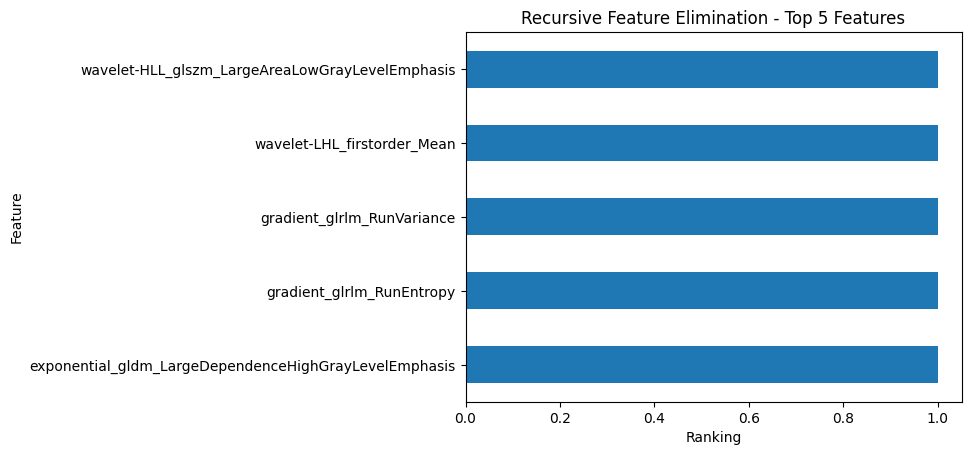

(94.71 ± 2.09)%
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        21
         1.0       1.00      0.85      0.92        13
         2.0       0.60      1.00      0.75         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.89        38
   macro avg       0.63      0.70      0.65        38
weighted avg       0.89      0.89      0.89        38



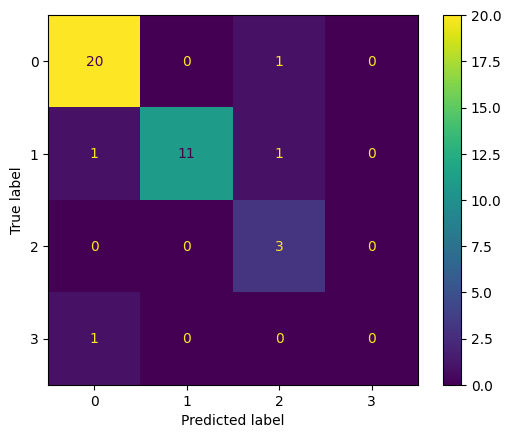

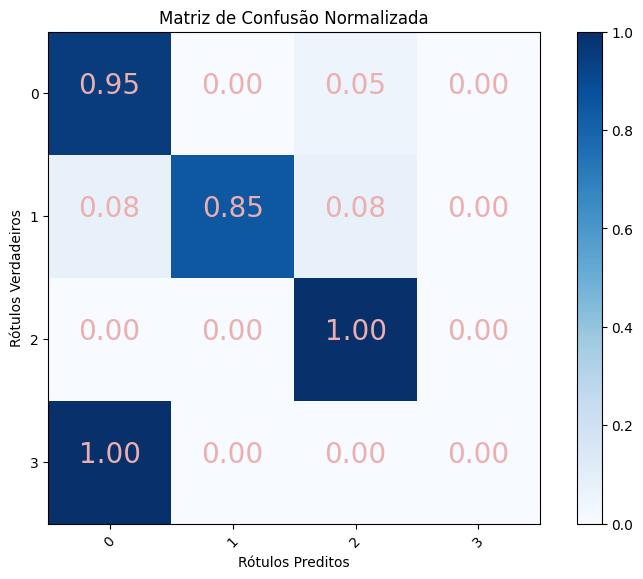

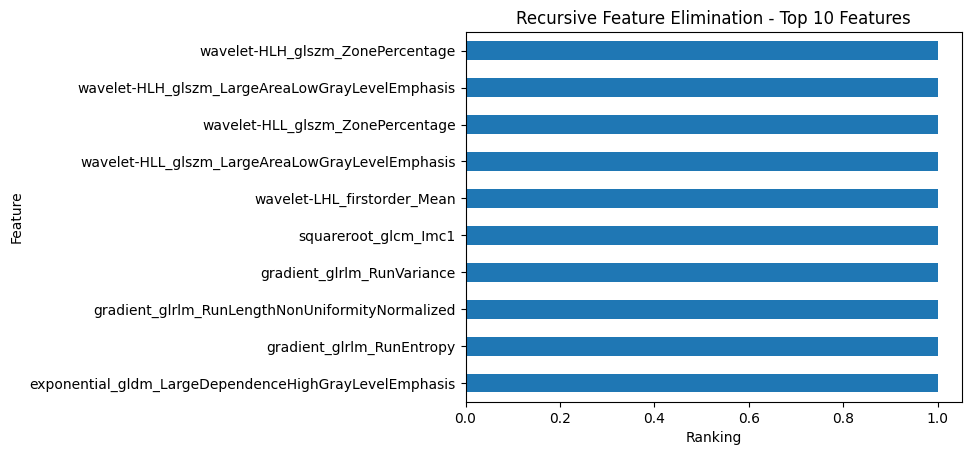

(94.98 ± 2.14)%
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        21
         1.0       0.92      0.92      0.92        13
         2.0       0.67      0.67      0.67         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.89        38
   macro avg       0.62      0.64      0.63        38
weighted avg       0.87      0.89      0.88        38



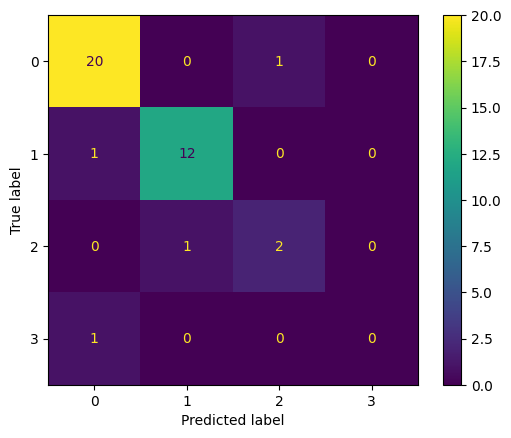

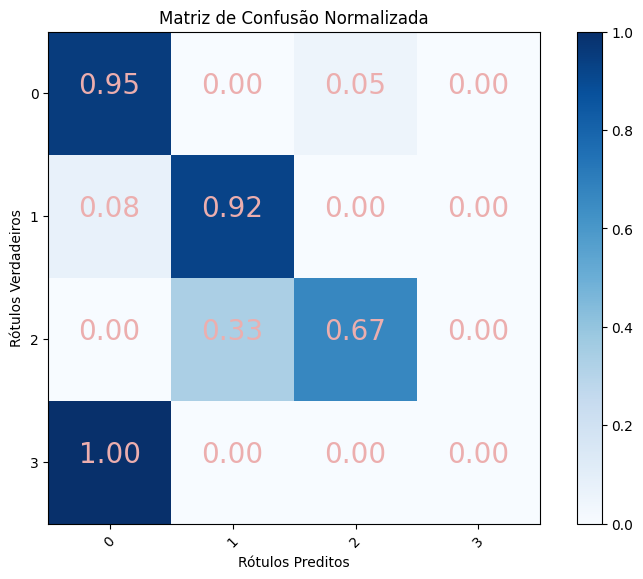

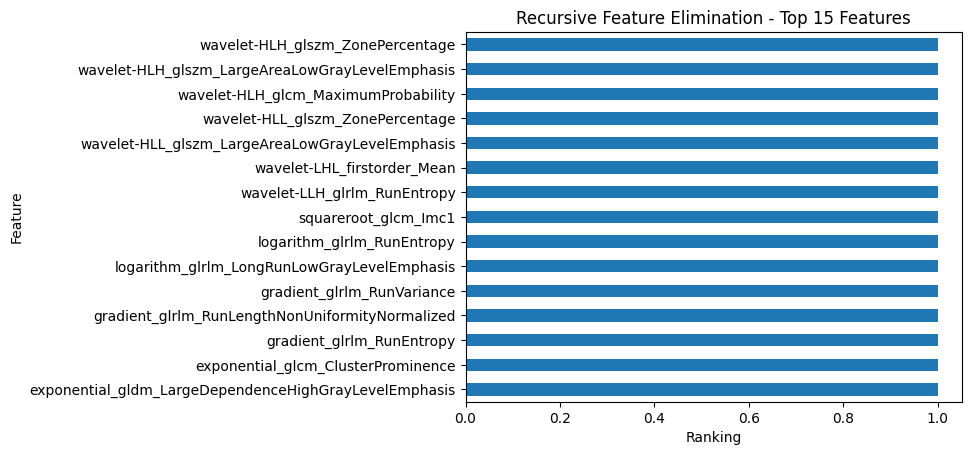

(96.04 ± 2.12)%
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        21
         1.0       0.92      0.92      0.92        13
         2.0       1.00      0.67      0.80         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.92        38
   macro avg       0.71      0.65      0.67        38
weighted avg       0.90      0.92      0.91        38



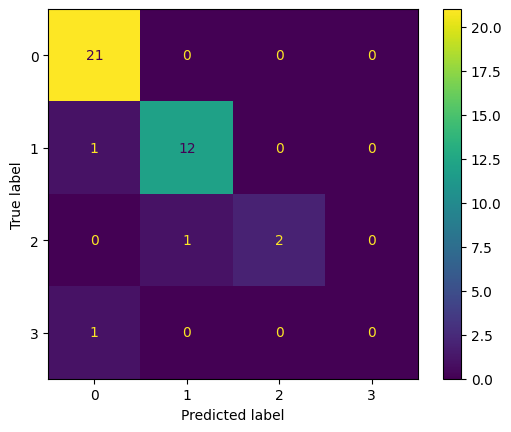

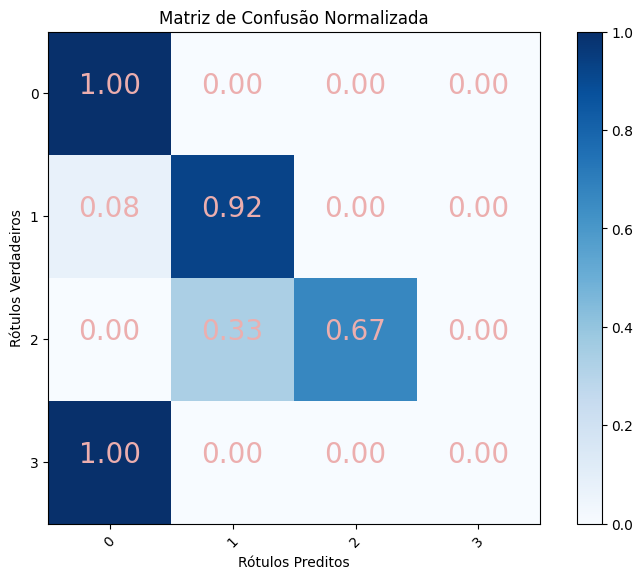

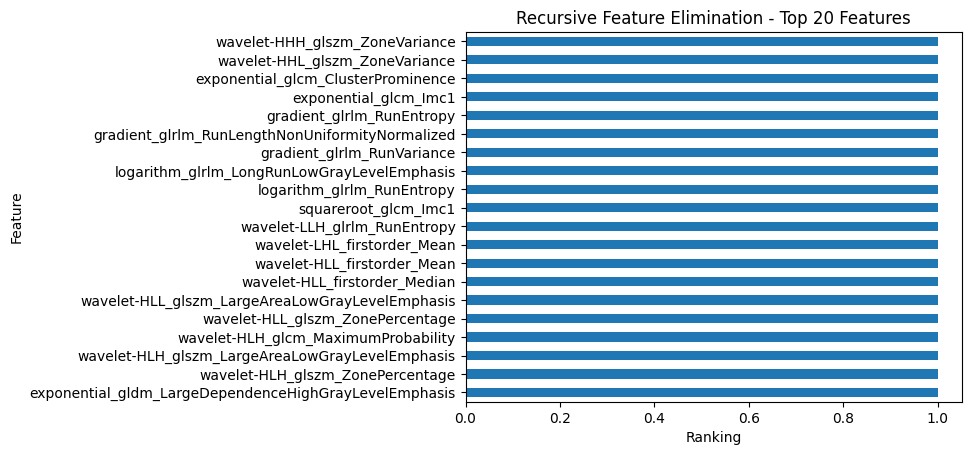

(95.64 ± 2.41)%
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        21
         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.67      0.80         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.92        38
   macro avg       0.70      0.65      0.67        38
weighted avg       0.90      0.92      0.91        38



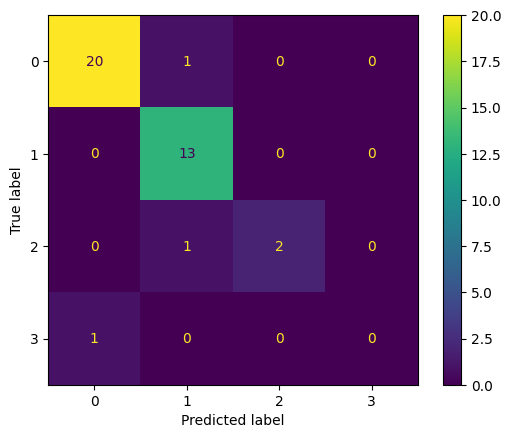

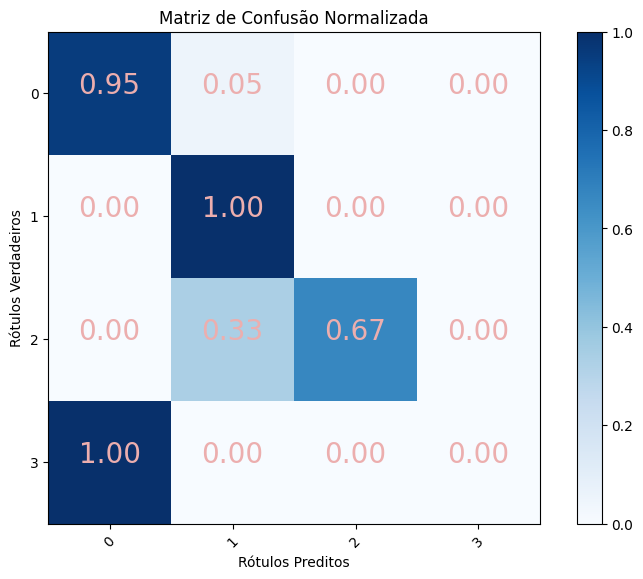

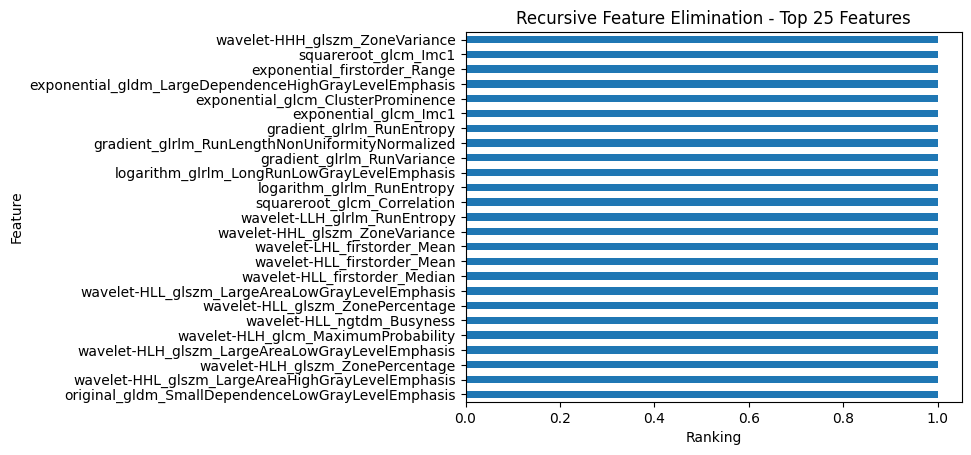

(96.17 ± 2.10)%
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        21
         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.67      0.80         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.92        38
   macro avg       0.70      0.65      0.67        38
weighted avg       0.90      0.92      0.91        38



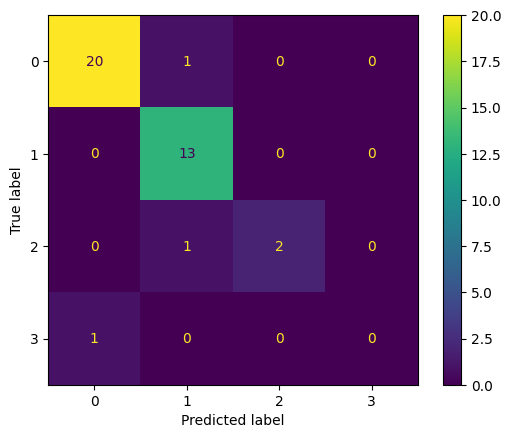

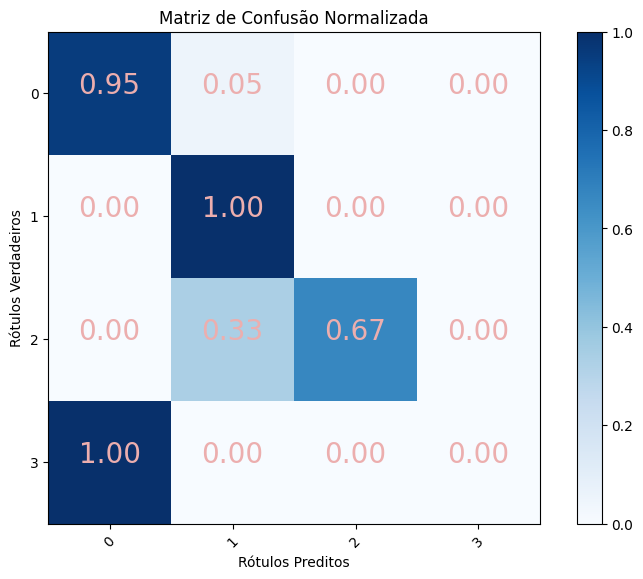

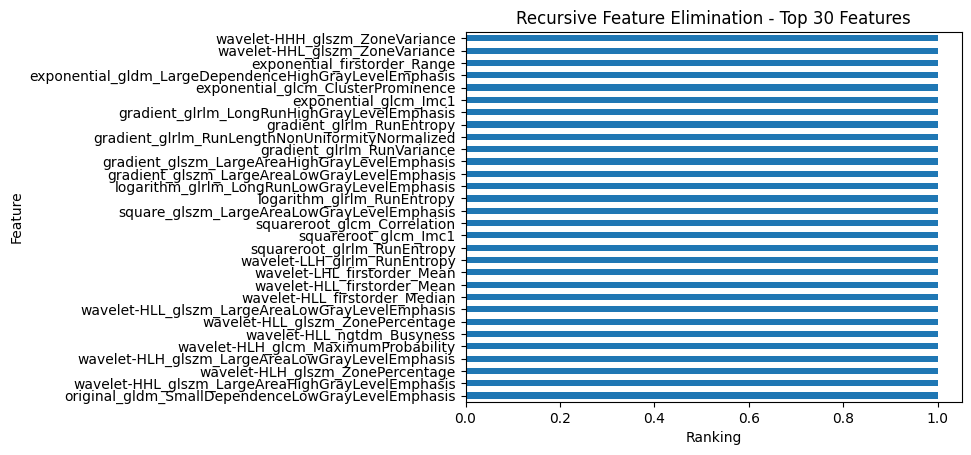

(96.17 ± 2.10)%
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        21
         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.67      0.80         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.92        38
   macro avg       0.70      0.65      0.67        38
weighted avg       0.90      0.92      0.91        38



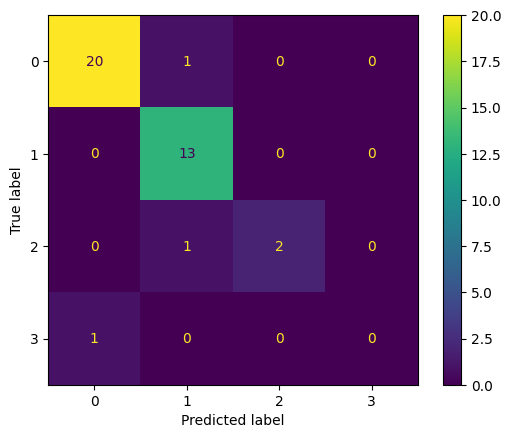

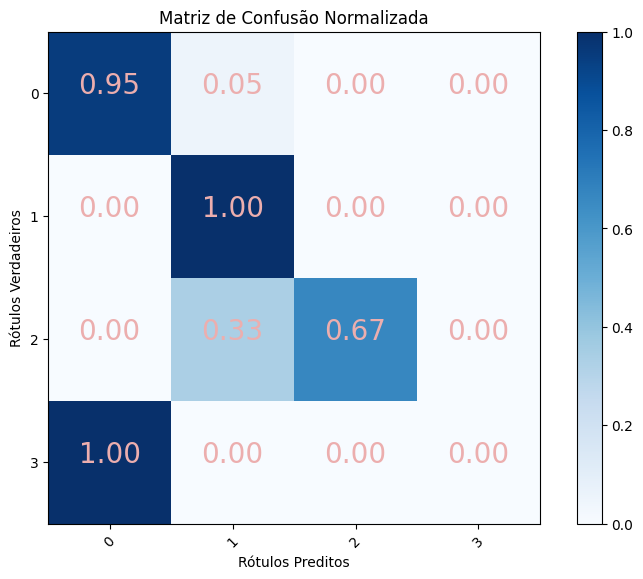

best n = 25, best accurancy = 0.9616852561868248


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
import warnings
import warnings
warnings.filterwarnings("ignore")

# Load the data
# Load the data
train_data = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/R_treino_imagens.csv', engine='python', sep=';')
test_data = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/R_teste_imagens.csv', engine='python', sep=';')

# Step 1: Read the CSV file


# Step 2: Separate the features and labels
X_train = train_data.drop('Grade', axis=1)  # Replace 'target_column_name' with your target column name
y_train = train_data['Grade']

X_test = test_data.drop('Grade', axis=1)    # Replace 'target_column_name' with your target column name
y_test = test_data['Grade']



# Step 4: Apply SMOTE
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


#df_norm_new=dados
#Train data


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int (x) for x in np.linspace(start = 0, stop = 10, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int (x) for x in np.linspace(start = 0, stop = 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
random_state = [int (x) for x in np.linspace(start = 0, stop = 111, num = 5)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score,
               'random_state': random_state}



# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier(random_state=0,criterion='gini')

#rf = RandomForestRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 10, cv = 5, verbose = 2,
                               random_state = 0 , n_jobs = 4, scoring = 'accuracy')


rf_random.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_rf = rf_random.best_estimator_
best_params = rf_random.best_params_


print("Best Hyperparameters:")
print(best_params)
best_acc = 0.0
# Passo 3: Loop para RFE com diferentes números de características selecionadas
for n_features in range(5, 32, 5):
    # RFE com Random Forest
    model = RandomForestClassifier(**best_params)  # Substitua com seus próprios parâmetros
    rfe = RFE(model, n_features_to_select=n_features, importance_getter='auto')
    fit = rfe.fit(X_train_resampled, y_train_resampled)



    # Plotar Gráfico de Barras para as Melhores Características
    selected_features = X_train.columns[fit.support_]
    feature_ranking = pd.Series(fit.ranking_, index=X_train.columns)
    best_features_ranking = feature_ranking[selected_features].sort_values()
    best_features_ranking.plot(kind='barh')
    plt.xlabel('Ranking')
    plt.ylabel('Feature')
    plt.title(f'Recursive Feature Elimination - Top {n_features} Features')
    plt.show()

    # Treinar e Avaliar o Modelo com as Melhores Características
    
    X_train_selected = X_train_resampled[selected_features]
    X_test_selected = X_test[selected_features]

    # Treine seu modelo com X_train_selected e y_train_smote
    fit = model.fit(X_train_selected, y_train_resampled)

    # Faça previsões no conjunto de teste
    y_pred = fit.predict(X_test_selected)

    # Accuracy with cross-validation
    cv_accuracy = cross_val_score(model, X_train_selected, y_train_resampled, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_accuracy.mean()
    dev_cv_accuracy = cv_accuracy.std()
    print(f'({100*mean_cv_accuracy:.2f} ± {100*dev_cv_accuracy:.2f})%' )
    if best_acc < cv_accuracy.mean():
        best_acc = cv_accuracy.mean()
        best_n = n_features 
    
    # Classification report
    classification_rep = classification_report(y_test, y_pred)
    print(classification_rep)
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    # Criar um heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title('Matriz de Confusão Normalizada')
    plt.colorbar()

    # Adicionar rótulos aos eixos
    class_labels = ['0','1','2','3']  # Substitua pelos seus rótulos
    # Configure o tamanho da fonte
    a = True
    
    plt.rc('font', size=20)  # Defina o tamanho da fonte desejado
    
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    # Adicionar os valores nas células
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, f"{cm[i, j]:.2f}", horizontalalignment="center", color="#ECAEAE")

    plt.tight_layout()
    plt.xlabel('Rótulos Preditos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()
    plt.rc('font', size=10)
print(f'best n = {best_n}, best accurancy = {best_acc}')